In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
model_file = drive.CreateFile({'id': '1yflaJnBsbw3Zu3u7wID7d_qfPjTnSoPx'})
model_file.GetContentFile('my.model')

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential([
    Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)),
    Activation('relu'),
    Conv2D(32, (3, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), padding='same'),
    Activation('relu'),
    Conv2D(64, (3, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(512),
    Activation('relu'),
    Dropout(0.5),
    Dense(10),
    Activation('softmax'),
])

model.load_weights('CIFAR.model')

In [7]:
import keras
from keras.datasets import cifar10

num_classes = 10

(X_train, y_train_class), (X_test, y_test_class) = cifar10.load_data()
print(f'x_train shape: {X_train.shape}')

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Convert class to class vector
y_train = keras.utils.to_categorical(y_train_class, num_classes)
y_test = keras.utils.to_categorical(y_test_class, num_classes)
print(f'y_train shape: {y_train.shape}')

170500096/170498071 [==============================] - 451s 3us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)


truck


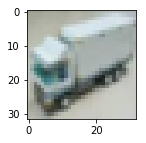

bird


bird


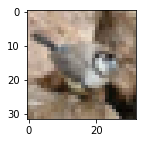

bird


In [9]:
import keras
import matplotlib.pyplot as plt
import random

NAMES = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck',
]

num_classes = 10

for i in random.sample(range(1,100), 4):
    print(NAMES[int(y_train_class[i])])
    plt.figure(figsize = (2, 2))
    plt.imshow(X_train[i])
    plt.show()

In [10]:
y_pred = model.predict(X_test)

Predicted: cat
Correct: cat


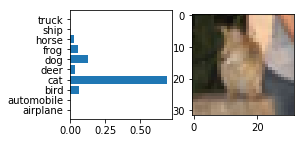

Predicted: cat
Correct: horse


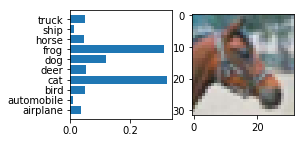

Predicted: ship
Correct: ship


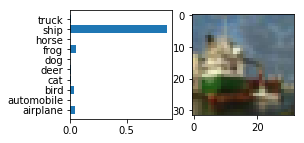

Predicted: frog
Correct: cat


Predicted: airplane
Correct: airplane


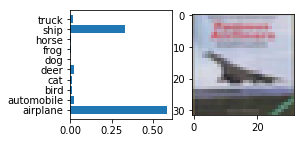

Predicted: frog
Correct: frog


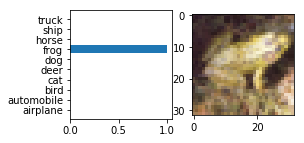

Predicted: truck
Correct: truck


Predicted: deer
Correct: dog


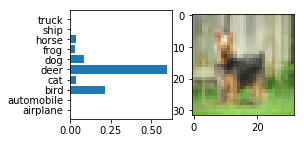

Predicted: dog
Correct: dog


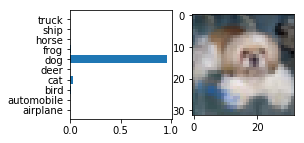

Predicted: horse
Correct: horse


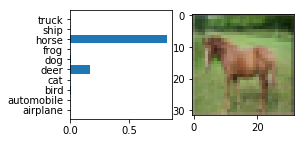

In [18]:
import numpy as np

for i in random.sample(range(1,100), 10):
    pred = y_pred[i]
    pred_name = NAMES[np.argmax(pred)]
    correct_name = NAMES[int(y_test_class[i])]
    print(f'Predicted: {pred_name}')
    print(f'Correct: {correct_name}')

    fig = plt.figure(figsize=(4, 2))
    fig.add_subplot(1, 2, 1)
    plt.barh(np.arange(len(pred)), pred, tick_label=NAMES)

    fig.add_subplot(1, 2, 2)
    plt.imshow(X_test[i])
    plt.show()

In [17]:
correct = sum([ np.argmax(y_pred[i]) == y_test_class[i][0] for i in range(len(y_pred)) ])
total = len(y_pred)
print(correct / total)

0.6367
